# Training Models to classify images into categories and subcategories

Importing required libraries 

In [54]:
import numpy as np
import matplotlib.pyplot as plt
import skimage.feature
from sklearn.linear_model import SGDClassifier
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
#from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.optimizers import SGD
from keras.utils import np_utils
#from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
import cv2 
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import plot_confusion_matrix
import pandas as pd



Loading CIFAR-100 dataset. The images need to be transposed since their original shape isn't suitable for training

In [2]:
trnImages = np.load('trnImage.npy')
trnLabelF = np.load('trnLabel_fine.npy')
trnLabelC = np.load('trnlabel_coarse.npy')
tstImage = np.load('tstImage.npy')
tstLabelF = np.load('tstLabel_fine.npy')
tstLabelC = np.load('tstLabel_coarse.npy')


subcategory = ['apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle', 'bicycle', 'bottle', 'bowl', 'boy', 'bridge', 'bus', 'butterfly', 'camel', 'can', 'castle', 'caterpillar', 'cattle', 'chair', 'chimpanzee', 'clock', 'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup', 'dinosaur', 'dolphin', 'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster', 'house', 'kangaroo', 'keyboard', 'lamp', 'lawn_mower', 'leopard', 'lion', 'lizard', 'lobster', 'man', 'maple_tree', 'motorcycle', 'mountain', 'mouse', 'mushroom', 'oak_tree', 'orange', 'orchid', 'otter', 'palm_tree', 'pear', 'pickup_truck', 'pine_tree', 'plain', 'plate', 'poppy', 'porcupine', 'possum', 'rabbit', 'raccoon', 'ray', 'road', 'rocket', 'rose', 'sea', 'seal', 'shark', 'shrew', 'skunk', 'skyscraper', 'snail', 'snake', 'spider', 'squirrel', 'streetcar', 'sunflower', 'sweet_pepper', 'table', 'tank', 'telephone', 'television', 'tiger', 'tractor', 'train', 'trout', 'tulip', 'turtle', 'wardrobe', 'whale', 'willow_tree', 'wolf', 'woman', 'worm'] 

category = ['aquatic_mammals', 'fish', 'flowers', 'food_containers', 'fruit_and_vegetables', 'household_electrical_devices', 'household_furniture', 'insects', 'large_carnivores', 'large_man-made_outdoor_things', 'large_natural_outdoor_scenes', 'large_omnivores_and_herbivores', 'medium_mammals', 'non-insect_invertebrates', 'people', 'reptiles', 'small_mammals', 'trees', 'vehicles_1', 'vehicles_2']


trnImages = np.transpose(trnImages, [3, 0, 1, 2])
tstImage = np.transpose(tstImage, [3, 0, 1, 2])
trnImages = trnImages


Image is 4D

- 1 is samples
- 2 is Height
- 3 is Width
- 4 is RGB


In [3]:
def plotResults(labels, prediction, category):
    plt.figure(figsize=(15,15))

    for i in range(25):
        plt.subplot(5,5,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.imshow(tstImage[i])
        plt.xlabel(category[(prediction[i])] + '\n' + category[labels[i]])

    plt.show()


def plotGraphs(model):
    plt.figure(figsize=[10,5])
    plt.subplot(121)
    plt.plot(model.history['accuracy'])
    plt.plot(model.history['val_accuracy'])
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(['Training Accuracy',
            'Validation Accuracy'])
    plt.title('Accuracy Curves')

    plt.subplot(122)
    plt.plot(model.history['loss'])
    plt.plot(model.history['val_loss'])
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(['Training Loss',
            'Validation Loss'])
    plt.title('Loss Curves')
    plt.show()

def argMax(data):
    example = []
    for x in range(len(data)):
        example.append(np.argmax(data[x]))
    return example

def hist(img):
  img_to_yuv = cv2.cvtColor(img,cv2.COLOR_BGR2YUV)
  img_to_yuv[:,:,0] = cv2.equalizeHist(img_to_yuv[:,:,0])
  hist_equalization_result = cv2.cvtColor(img_to_yuv, cv2.COLOR_YUV2BGR)
  return hist_equalization_result




Example of loading some images

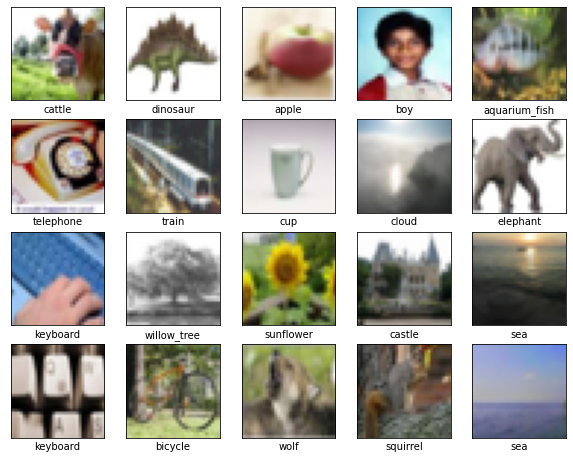

In [4]:

plt.figure(figsize=(10,10))

for i in range(20):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(trnImages[i])
    plt.xlabel(subcategory[trnLabelF[i]])

plt.show()


# Convolutional Neural Networks

modelF = A model used for predictiing fine labels for images

modelC = A model used for predictiing coarse labels for images

In [50]:
modelF = keras.models.Sequential()

modelF.add(Conv2D(32, (3, 3), activation='relu', padding = 'same', input_shape=(32, 32, 3)))
modelF.add(MaxPooling2D((2, 2)))
modelF.add(Dropout(0.2))
modelF.add(Conv2D(64, (3, 3), activation='relu', padding = 'same'))
modelF.add(MaxPooling2D((2, 2)))
modelF.add(Dropout(0.3))
modelF.add(Conv2D(128, (3, 3), activation='relu', padding = 'same'))
modelF.add(MaxPooling2D((2, 2)))
modelF.add(Dropout(0.35))


modelF.add(Flatten())
modelF.add(Dense(1024, activation='relu',))
modelF.add(Dropout(0.5))
modelF.add(Dense(100, activation= 'softmax'))

modelF.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
modelF.summary()




Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 8, 8, 128)        

In [6]:
historyF = modelF.fit(trnImages, trnLabelF, epochs=35, batch_size = 128, validation_split=0.2, verbose = 1)


2021-12-09 02:11:29.429414: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/35
313/313 [==============================] - 35s 110ms/step - loss: 4.1592 - accuracy: 0.0631 - val_loss: 3.6690 - val_accuracy: 0.1501
Epoch 2/35
313/313 [==============================] - 36s 114ms/step - loss: 3.5105 - accuracy: 0.1622 - val_loss: 3.2255 - val_accuracy: 0.2252
Epoch 3/35
313/313 [==============================] - 39s 124ms/step - loss: 3.1861 - accuracy: 0.2207 - val_loss: 3.0121 - val_accuracy: 0.2756
Epoch 4/35
313/313 [==============================] - 40s 127ms/step - loss: 2.9703 - accuracy: 0.2646 - val_loss: 2.8293 - val_accuracy: 0.3000
Epoch 5/35
313/313 [==============================] - 42s 133ms/step - loss: 2.8031 - accuracy: 0.2971 - val_loss: 2.6561 - val_accuracy: 0.3366
Epoch 6/35
313/313 [==============================] - 41s 132ms/step - loss: 2.6732 - accuracy: 0.3220 - val_loss: 2.5402 - val_accuracy: 0.3598
Epoch 7/35
313/313 [==============================] - 42s 134ms/step - loss: 2.5583 - accuracy: 0.3437 - val_loss: 2.4698 - val_ac

Accuracy of modelF is around 48%

In [7]:
resultsF = modelF.evaluate(tstImage, tstLabelF)

print(f'Test set loss: {resultsF[0]:0.2f}, test set accuracy: {resultsF[1]*100:0.2f}%')

313/313 [==============================] - 4s 13ms/step - loss: 2.0400 - accuracy: 0.4822
Test set loss: 2.04, test set accuracy: 48.22%


Results here show signs of overfitting

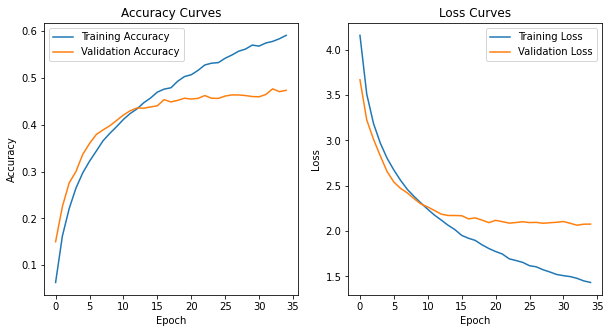

In [8]:
plotGraphs(historyF)
#plotGraphs(historyC)

Predicting the labels for the test images

In [9]:
predictionFine = modelF.predict(tstImage)


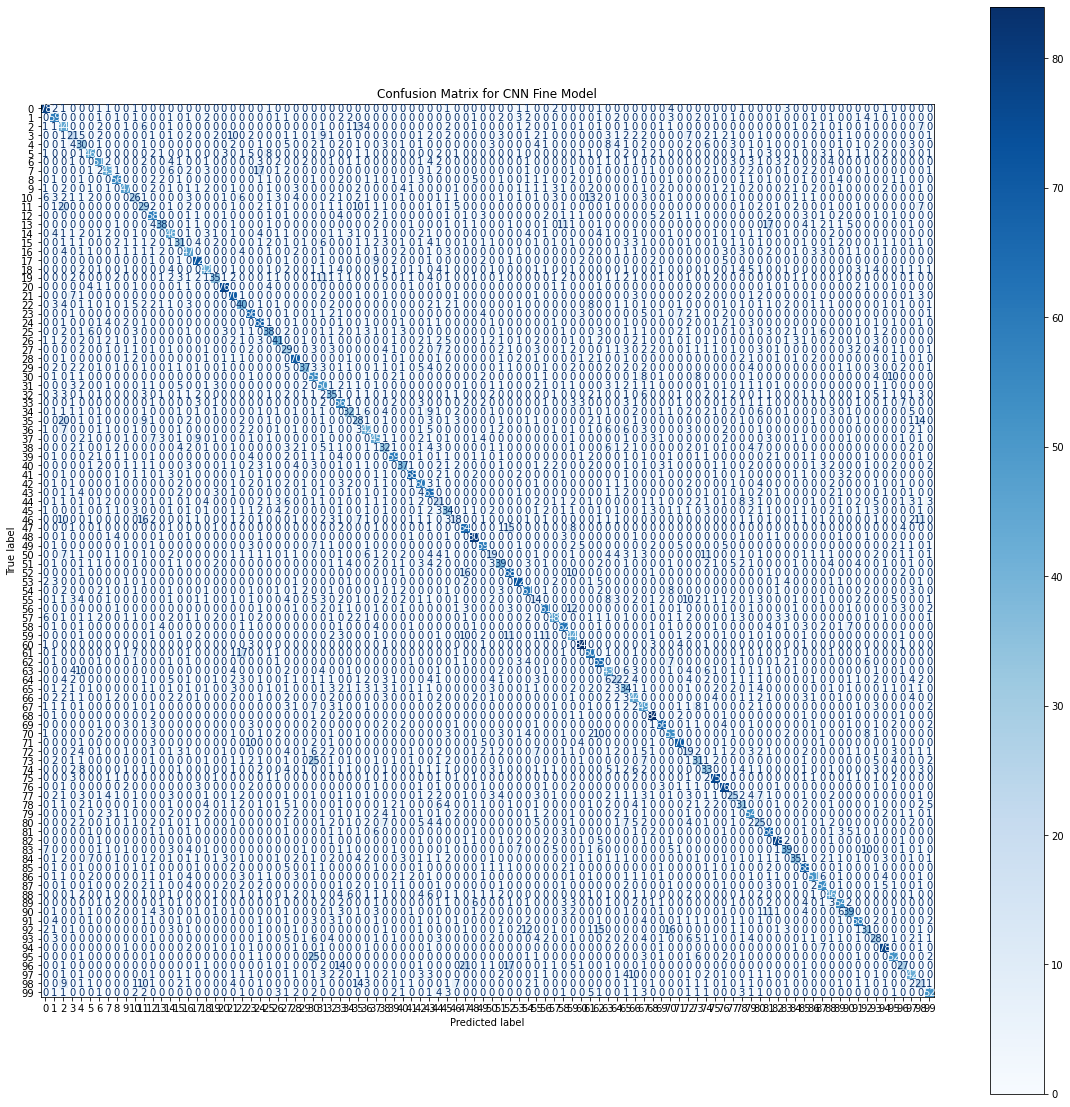

In [60]:
fig, ax = plt.subplots(figsize=(20, 20))
plt.title("Confusion Matrix for CNN Fine Model")
ConfusionMatrixDisplay.from_predictions(tstLabelF, predictionFine, cmap='Blues', ax=ax)

In [10]:
predictionFine = argMax(predictionFine)

As we can see, the model predicts a few of the images correctly. The top label is the prediction and the bottom label is the actual label

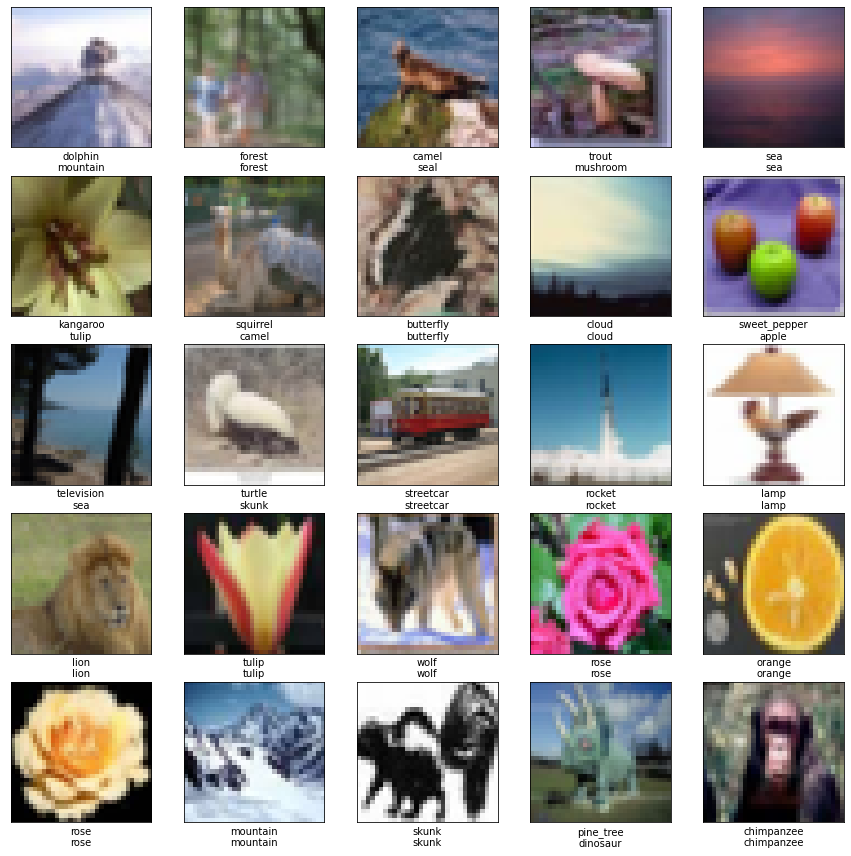

In [11]:
plotResults(tstLabelF, predictionFine, subcategory)

Coarse Labels Model

In [12]:
modelC = keras.models.Sequential()

modelC.add(Conv2D(32, (3, 3), activation='relu', padding = 'same', input_shape=(32, 32, 3)))
modelC.add(MaxPooling2D((2, 2)))
modelC.add(Dropout(0.1))
modelC.add(Conv2D(64, (3, 3), activation='relu', padding = 'same'))
#model.add(Conv2D(64, (3, 3), activation='relu', padding = 'same'))
modelC.add(MaxPooling2D((2, 2)))
modelC.add(Dropout(0.2))
modelC.add(Conv2D(128, (3, 3), activation='relu', padding = 'same'))
modelC.add(MaxPooling2D((2, 2)))
modelC.add(Dropout(0.35))


modelC.add(Flatten())
modelC.add(Dense(128, activation='relu',))
modelC.add(Dropout(0.5))
modelC.add(Dense(20, activation= 'softmax'))


modelC.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
modelC.summary()

resultC = modelC.predict(trnImages)


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 8, 8, 128)        

In [13]:
historyC = modelC.fit(trnImages, trnLabelC, epochs=35, batch_size = 128, validation_split=0.2, verbose = 1)

Epoch 1/35
313/313 [==============================] - 34s 108ms/step - loss: 2.7246 - accuracy: 0.1517 - val_loss: 2.4518 - val_accuracy: 0.2585
Epoch 2/35
313/313 [==============================] - 33s 106ms/step - loss: 2.3938 - accuracy: 0.2591 - val_loss: 2.2132 - val_accuracy: 0.3253
Epoch 3/35
313/313 [==============================] - 33s 107ms/step - loss: 2.2435 - accuracy: 0.3076 - val_loss: 2.0610 - val_accuracy: 0.3727
Epoch 4/35
313/313 [==============================] - 34s 108ms/step - loss: 2.1415 - accuracy: 0.3379 - val_loss: 1.9477 - val_accuracy: 0.4013
Epoch 5/35
313/313 [==============================] - 34s 108ms/step - loss: 2.0591 - accuracy: 0.3614 - val_loss: 1.8704 - val_accuracy: 0.4264
Epoch 6/35
313/313 [==============================] - 34s 108ms/step - loss: 1.9820 - accuracy: 0.3835 - val_loss: 1.8081 - val_accuracy: 0.4417
Epoch 7/35
313/313 [==============================] - 34s 108ms/step - loss: 1.9202 - accuracy: 0.4060 - val_loss: 1.7364 - val_ac

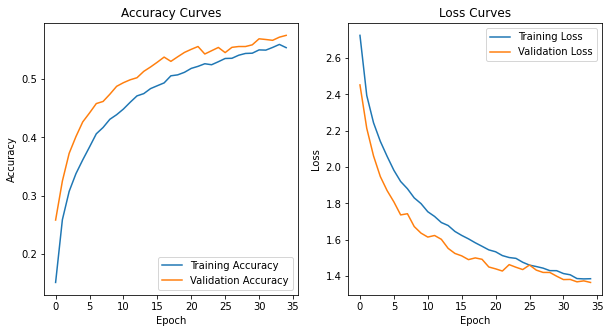

In [14]:
plotGraphs(historyC)

In [15]:
resultsC = modelC.evaluate(tstImage, tstLabelC)

print(f'Test set loss: {resultsC[0]:0.2f}, test set accuracy: {resultsC[1]*100:0.2f}%')

313/313 [==============================] - 3s 8ms/step - loss: 1.3510 - accuracy: 0.5790
Test set loss: 1.35, test set accuracy: 57.90%


In [16]:
predictionCoarse = modelC.predict(tstImage)

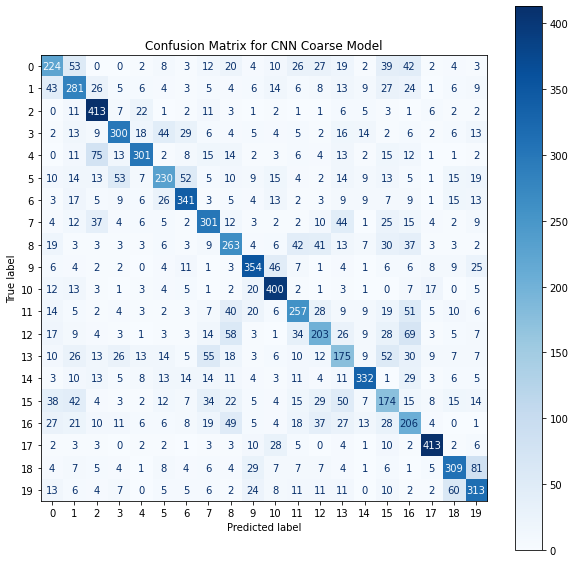

In [61]:
fig, ax = plt.subplots(figsize=(10, 10))
plt.title("Confusion Matrix for CNN Coarse Model")

ConfusionMatrixDisplay.from_predictions(tstLabelC, predictionCoarse, cmap='Blues', ax=ax)

In [17]:
predictionCoarse = argMax(predictionCoarse)

The model predicts a few of the images correctly. The top label is the prediction and the bottom label is the actual label

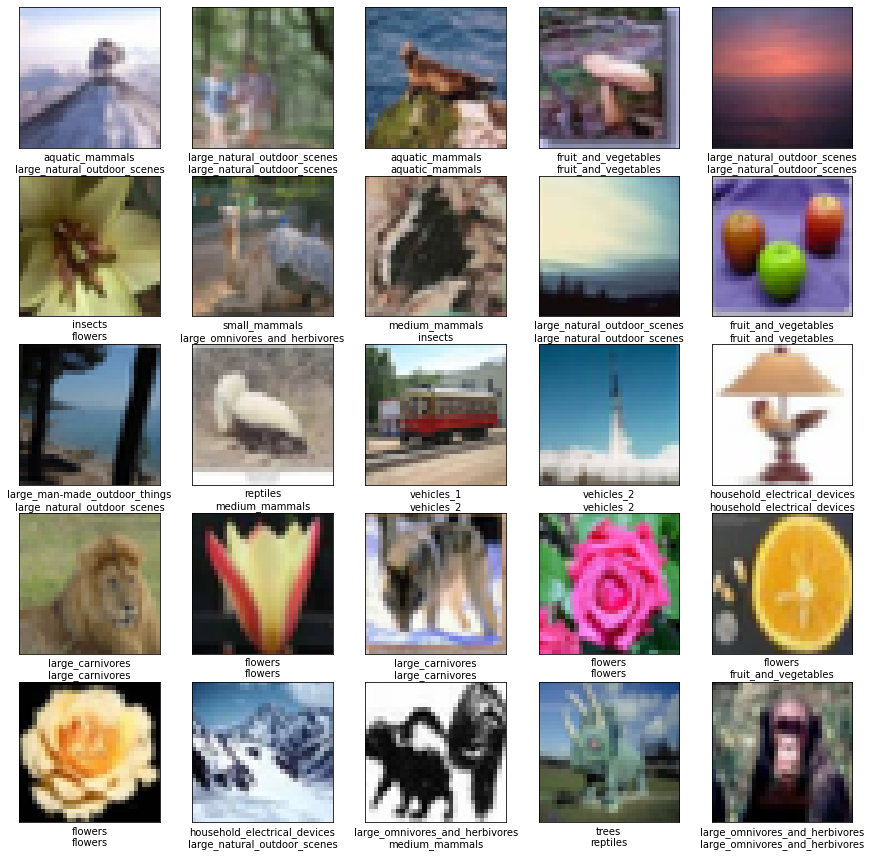

In [18]:
plotResults(tstLabelC, predictionCoarse, category)

# PCA, SVM and KNN

Feature extraction for SVM and KNN

In [19]:
pca = PCA(n_components=4)

trnshape, tx, ty, tz = trnImages.shape
tstshape, tsx, tsy, tsz = tstImage.shape

trnData = trnImages.reshape(trnshape, tx*ty*tz)
tstData = tstImage.reshape(tstshape, tsx*tsy*tsz)


pca.fit(trnData)


PCA(n_components=4)

In [20]:
k = 0
total = sum(pca.explained_variance_)
current_sum = 0

while(current_sum / total < 0.98):
    current_sum += pca.explained_variance_[k]
    k += 1
k

4

In [21]:
pca = PCA(n_components=k, whiten=True, svd_solver='randomized')

x_train_pca = pca.fit_transform(trnData)
x_test_pca = pca.transform(tstData)

# SVM model for Coarse Labels

In [22]:
svcC = svm.SVC()
svcC.fit(x_train_pca, trnLabelC)

SVC()

In [23]:
y_pred_svmC = svcC.predict(x_test_pca)
svc_scoreC = accuracy_score(tstLabelC, y_pred_svmC)
svc_scoreC


0.2103

In [53]:
svcC

SVC()

Confusion Matrix for SVM Coarse 

/Users/amekid/Documents/GitHub/bigDataLabs/lab4/tensorflow-metal/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


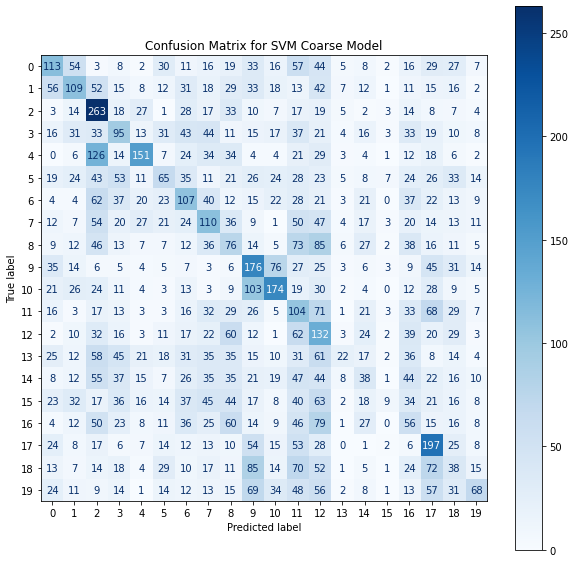

In [62]:
svcCM = confusion_matrix(y_pred_svmC, tstLabelC)
fig, ax = plt.subplots(figsize=(10, 10))
plt.title("Confusion Matrix for SVM Coarse Model")

plot_confusion_matrix(svcC,x_test_pca, tstLabelC,cmap='Blues', ax=ax)

The model predicts a few of the images correctly. The top label is the prediction and the bottom label is the actual label

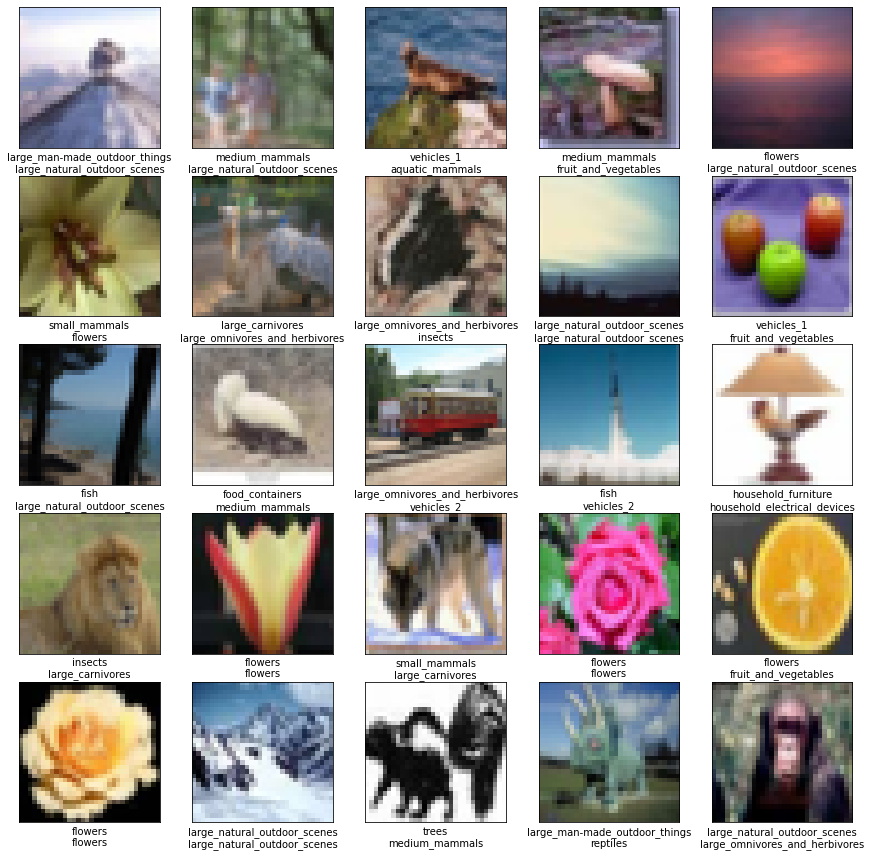

In [25]:
plotResults(tstLabelC, y_pred_svmC, category)

# SVM model for Fine Labels

In [26]:
svcF = svm.SVC()
svcF.fit(x_train_pca, trnLabelF)

SVC()

In [27]:
y_pred_svmF = svcF.predict(x_test_pca)
svc_scoreF = accuracy_score(tstLabelF, y_pred_svmF)
svc_scoreF

0.1135

Confusion Matrix for SVM Fine 

/Users/amekid/Documents/GitHub/bigDataLabs/lab4/tensorflow-metal/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


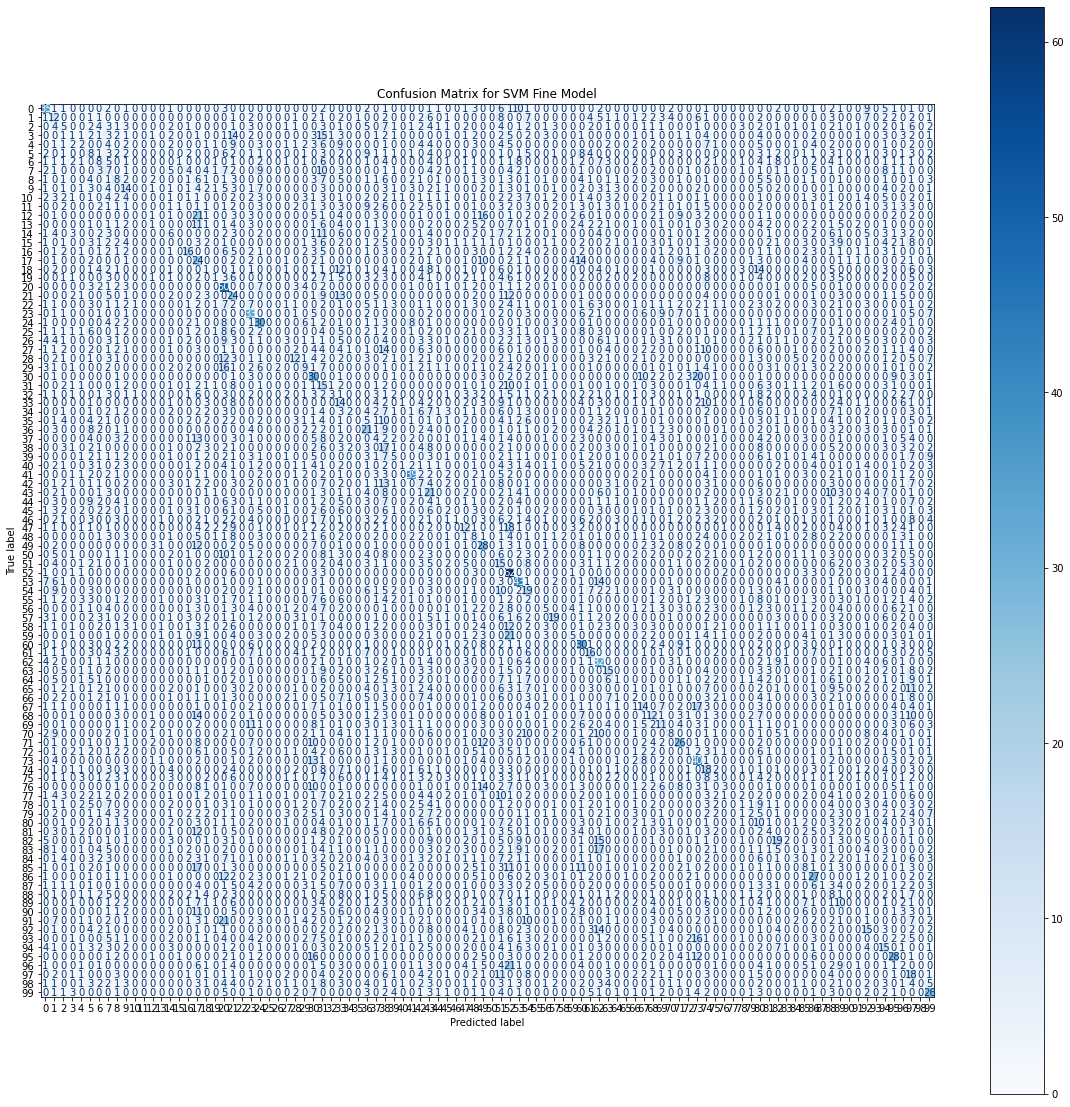

In [63]:
svcCF = confusion_matrix(y_pred_svmF, tstLabelF)
fig, ax = plt.subplots(figsize=(20, 20))
plt.title("Confusion Matrix for SVM Fine Model")

plot_confusion_matrix(svcF,x_test_pca, tstLabelF,cmap='Blues', ax = ax)

The model predicts a few of the images correctly. The top label is the prediction and the bottom label is the actual label

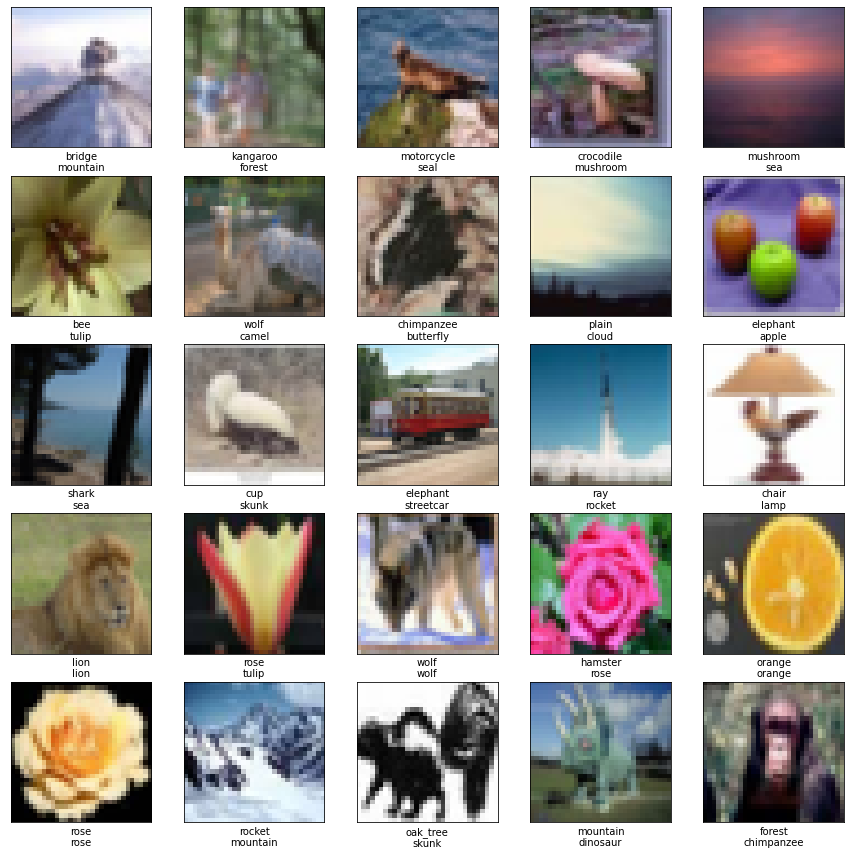

In [29]:
plotResults(tstLabelF, y_pred_svmF, subcategory)

# KNN for Coarse Labels

Finding the optimal K value for coarse labels

Minimum error:- 0.803 at K = 38


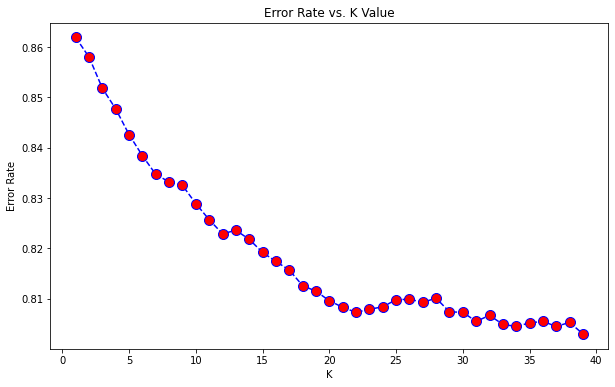

In [30]:
error_rate = []
for i in range(1,40):
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(x_train_pca,trnLabelC)
 pred_i = knn.predict(x_test_pca)
 error_rate.append(np.mean(pred_i != tstLabelC))

plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate)))

Maximum accuracy:- 0.197 at K = 38


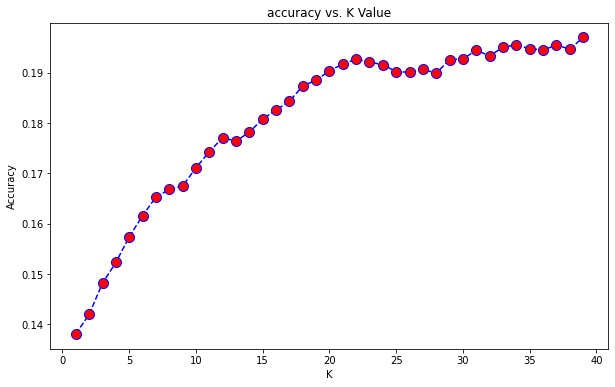

In [31]:

acc = []
from sklearn import metrics
for i in range(1,40):
    neigh = KNeighborsClassifier(n_neighbors = i).fit(x_train_pca,trnLabelC)
    yhat = neigh.predict(x_test_pca)
    acc.append(metrics.accuracy_score(tstLabelC, yhat))
    
plt.figure(figsize=(10,6))
plt.plot(range(1,40),acc,color = 'blue',linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')
print("Maximum accuracy:-",max(acc),"at K =",acc.index(max(acc)))
maxK = acc.index(max(acc))

In [32]:
maxK = acc.index(max(acc))

In [33]:
knnC = KNeighborsClassifier(n_neighbors=maxK)
knnC.fit(x_train_pca, trnLabelC)


KNeighborsClassifier(n_neighbors=38)

In [34]:
y_pred_knnC = knnC.predict(x_test_pca)

knn_score = accuracy_score(tstLabelC, y_pred_knnC)
knn_score

0.1947

Confusion Matrix for KNN Coarse 

/Users/amekid/Documents/GitHub/bigDataLabs/lab4/tensorflow-metal/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


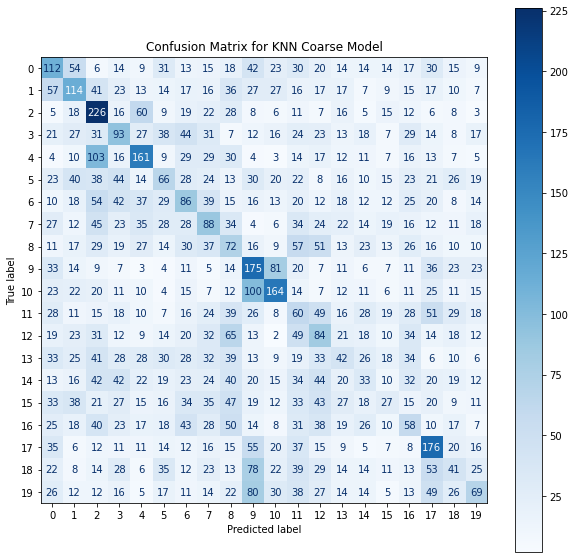

In [64]:
knnCM = confusion_matrix(y_pred_knnC, tstLabelC)
fig, ax = plt.subplots(figsize=(10, 10))
plt.title("Confusion Matrix for KNN Coarse Model")

plot_confusion_matrix(knnC,x_test_pca, tstLabelC,cmap='Blues' ,ax = ax)

The model predicts a few of the images correctly. The top label is the prediction and the bottom label is the actual label

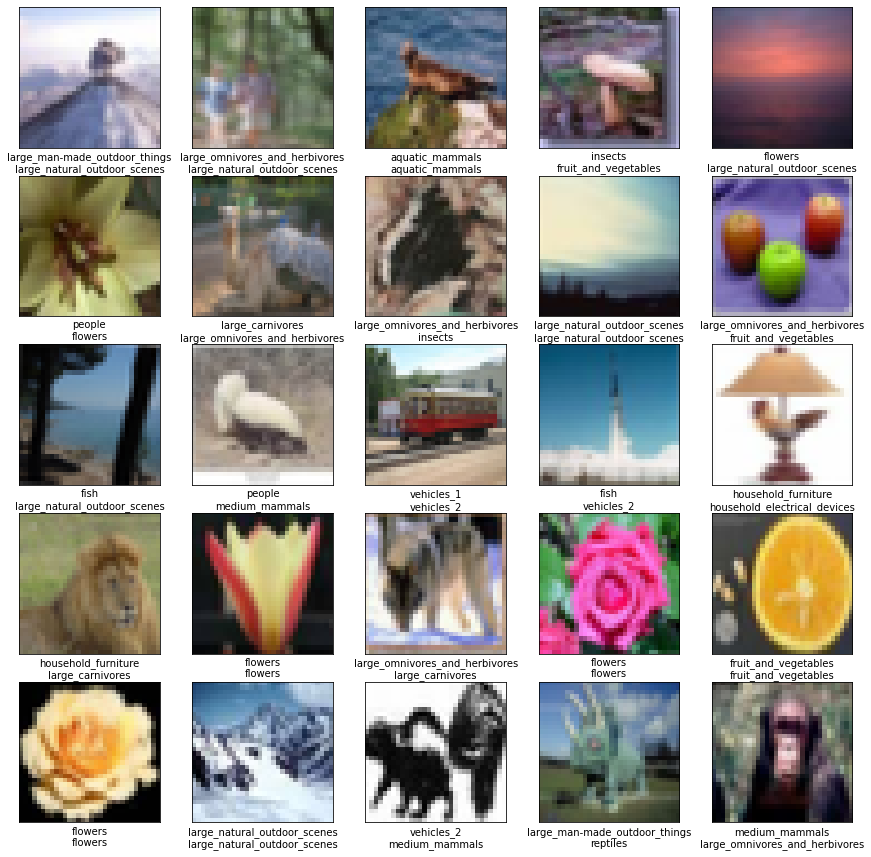

In [36]:
plotResults(tstLabelC, y_pred_knnC, category)

# KNN for Fine Labels

Finding the optimal K value for fine labels


Minimum error:- 0.905 at K = 37


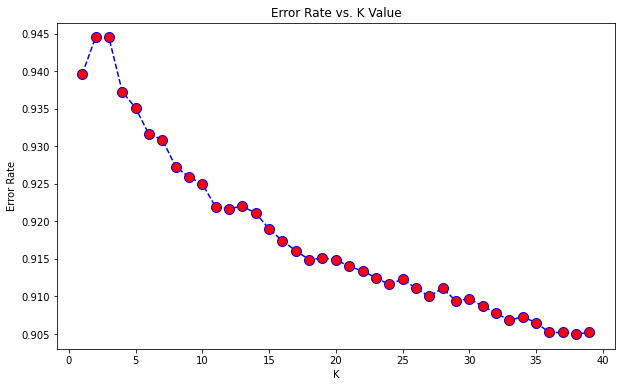

In [37]:
error_rate = []
for i in range(1,40):
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(x_train_pca,trnLabelF)
 pred_i = knn.predict(x_test_pca)
 error_rate.append(np.mean(pred_i != tstLabelF))

plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate)))

Maximum accuracy:- 0.095 at K = 37


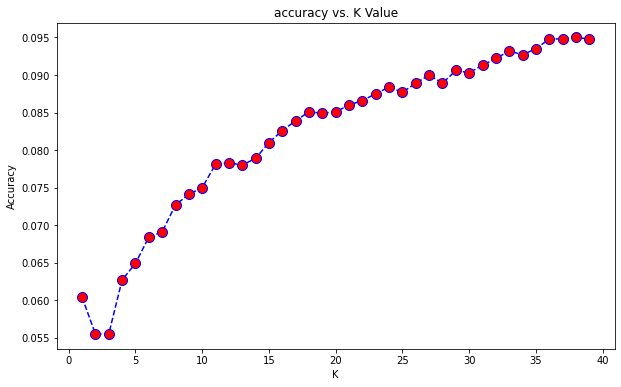

In [38]:
acc = []
for i in range(1,40):
    neigh = KNeighborsClassifier(n_neighbors = i).fit(x_train_pca,trnLabelF)
    yhat = neigh.predict(x_test_pca)
    acc.append(metrics.accuracy_score(tstLabelF, yhat))
    
plt.figure(figsize=(10,6))
plt.plot(range(1,40),acc,color = 'blue',linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')
print("Maximum accuracy:-",max(acc),"at K =",acc.index(max(acc)))
maxK = acc.index(max(acc))

In [39]:
knnF = KNeighborsClassifier(n_neighbors=maxK)
knnF.fit(x_train_pca, trnLabelF)

KNeighborsClassifier(n_neighbors=37)

In [40]:
y_pred_knnF = knnF.predict(x_test_pca)

knn_scoreF = accuracy_score(tstLabelF, y_pred_knnF)
knn_scoreF

0.0948

Confusion Matrix for KNN Fine 

/Users/amekid/Documents/GitHub/bigDataLabs/lab4/tensorflow-metal/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


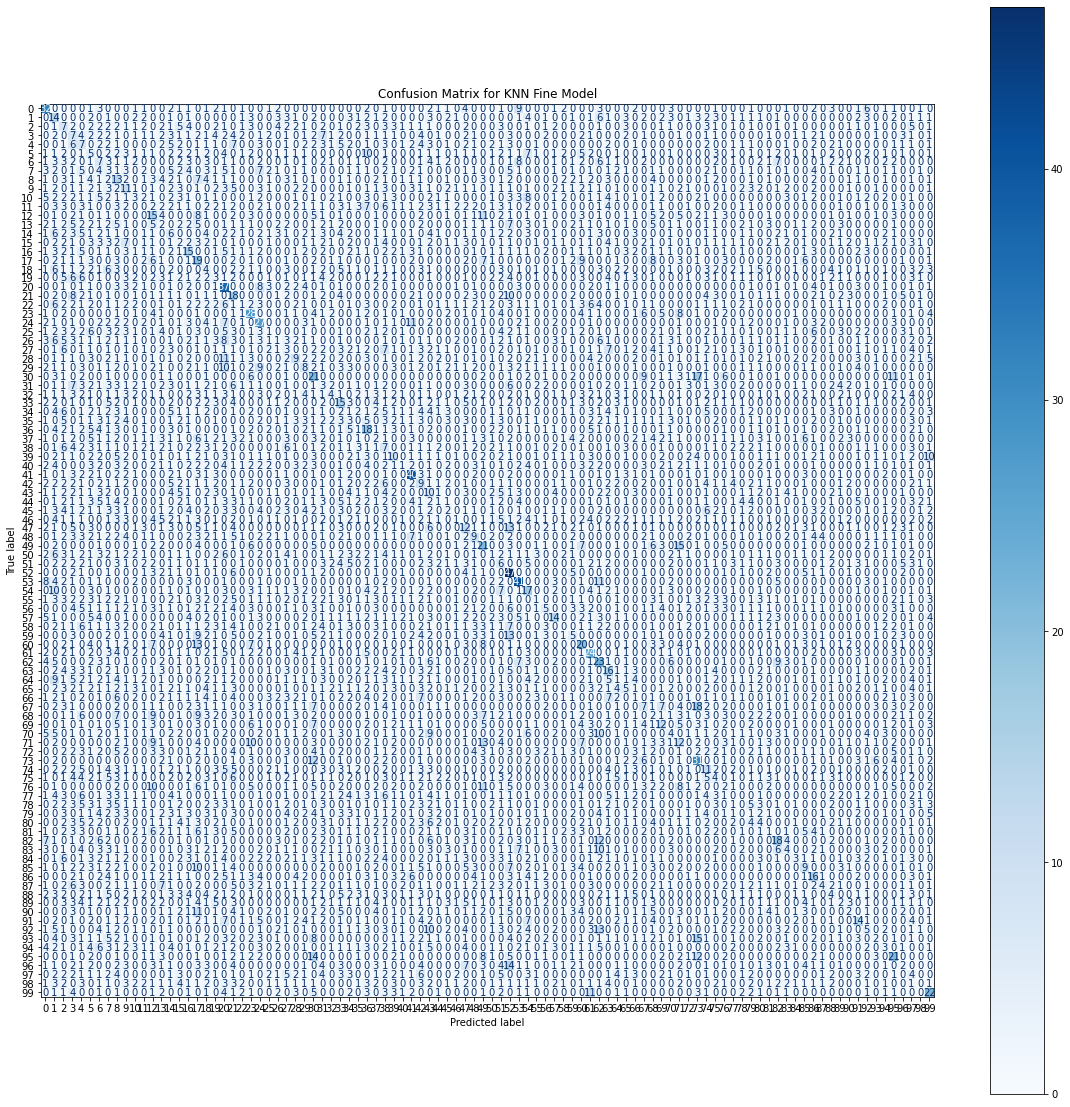

In [65]:
knnFM = confusion_matrix(y_pred_knnF, tstLabelF)
fig, ax = plt.subplots(figsize=(20, 20))
plt.title("Confusion Matrix for KNN Fine Model")

plot_confusion_matrix(knnF,x_test_pca, tstLabelF,cmap='Blues', ax = ax)

The model predicts a few of the images correctly. The top label is the prediction and the bottom label is the actual label

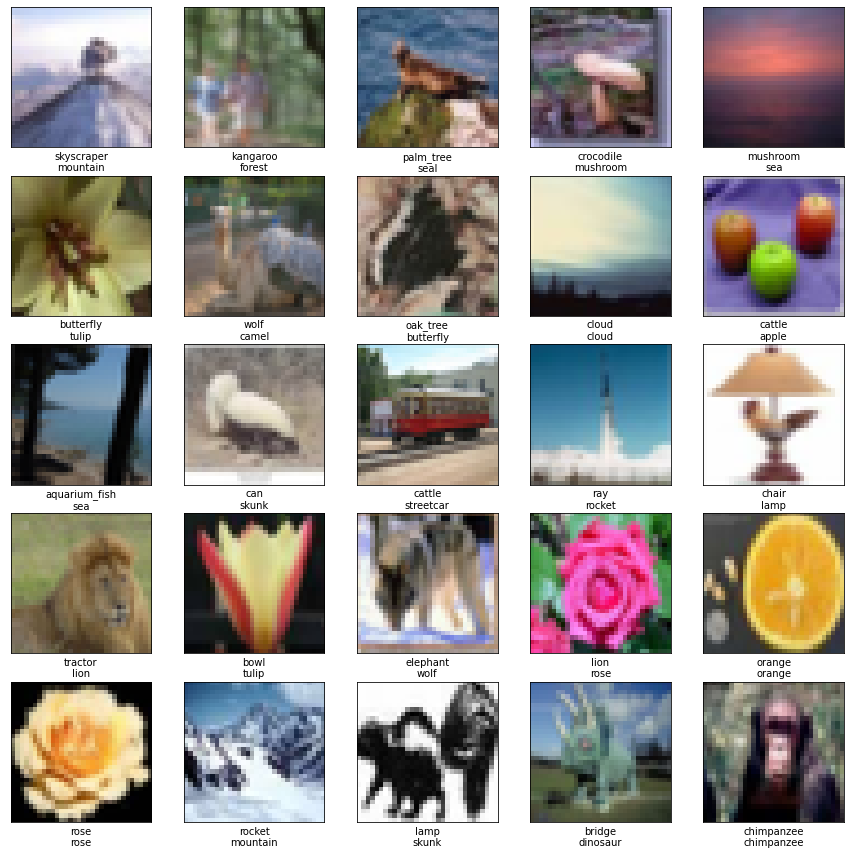

In [42]:
plotResults(tstLabelF, y_pred_knnF, subcategory)

In [59]:
results = [resultsF[1]*100,resultsC[1]*100, svc_scoreC*100, svc_scoreF*100, knn_score*100, knn_scoreF*100]
results

[48.21999967098236,
 57.89999961853027,
 21.029999999999998,
 11.35,
 19.470000000000002,
 9.48]

# Results of our models

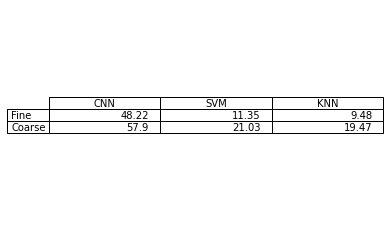

In [44]:
fig, ax =plt.subplots(1,1)
data=[[round(resultsF[1]*100, 3), svc_scoreF*100, knn_scoreF*100],
      [round(resultsC[1]*100, 2), round(svc_scoreC*100, 2), round(knn_score*100, 2)]]
column_labels=["CNN", "SVM", "KNN"]
df=pd.DataFrame(data,columns=column_labels)
ax.axis('tight')
ax.axis('off')
ax.table(cellText=df.values,colLabels=df.columns,rowLabels=["Fine","Coarse"],loc="center")

plt.show()
